In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
trainpath = '../datasets/GpositivePseAAC/Gram_positivePseAAC519_train_MVMD.mat'
testpath = '../datasets/GpositivePseAAC/Gram_positivePseAAC519_test_MVMD.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], np.array(train_['labels'])

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], np.array(test_['labels'])

a = train_data.max(axis=0)
b = train_data.min(axis=0)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 208/208 [00:00<00:00, 6218.52it/s]

Train data shape:  (311, 1, 300)
Train labels shape:  (311, 4)
Test data shape:  (208, 1, 300)
Test labels shape:  (208, 4)


## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (105, 1, 300)
Train Labels shape is  (105, 2)
Classes trained are: 0 to 2


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 2500/2500 [32:06<00:00,  1.30it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.348558  |
| zero_one_loss       | 0.663462  |
| one_error           | 0.0336538 |
| micro av. jaccard   | 0.325581  |
| macro av. jaccard   | 0.168269  |
| micro av. precision | 0.336538  |
| macro av. precision | 0.168269  |
| micro av. recall    | 0.909091  |
| macro av. recall    | 0.5       |
| micro av. f1        | 0.491228  |
| macro av. f1        | 0.251799  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.348558  |
| zero_one_loss       | 0.663462  |
| one_error           | 0.0336538 |
| micro av. jaccard   | 0.325581  |
| macro av. jaccard   | 0.168269  |
| micro av. precision | 0.336538  |
| macro av. precis

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 4
Class 2, class 1 neurons = 2, class 0 neurons = 3


100%|██████████| 2500/2500 [53:10<00:00,  1.28s/it]


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.557692 |
| zero_one_loss       | 0.557692 |
| one_error           | 0.557692 |
| micro av. jaccard   | 0.283951 |
| macro av. jaccard   | 0.244543 |
| micro av. precision | 0.442308 |
| macro av. precision | 0.708543 |
| micro av. recall    | 0.442308 |
| macro av. recall    | 0.536    |
| micro av. f1        | 0.442308 |
| macro av. f1        | 0.36149  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 3) (208, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.418269  |
| zero_one_loss       | 0.990385  |
| one_error           | 0.0192308 |
| micro av. jaccard   | 0.369565  |
| macro av. jaccard   | 0.251208  |
| micro av. precision | 0.375921  |
| macro av. precision | 0.251208  |
| micro av. recall    |

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 3, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 14, class 0 neurons = 6
Class 3, class 1 neurons = 10, class 0 neurons = 2


100%|██████████| 2500/2500 [1:48:48<00:00,  2.61s/it]


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.355769 |
| zero_one_loss       | 0.355769 |
| one_error           | 0.355769 |
| micro av. jaccard   | 0.475177 |
| macro av. jaccard   | 0.459518 |
| micro av. precision | 0.644231 |
| macro av. precision | 0.662766 |
| micro av. recall    | 0.644231 |
| macro av. recall    | 0.724939 |
| micro av. f1        | 0.644231 |
| macro av. f1        | 0.624219 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 4) (208, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.405048  |
| zero_one_loss       | 1         |
| one_error           | 0.0240385 |
| micro av. jaccard   | 0.36773   |
| macro av. jaccard   | 0.279249  |
| micro av. precision | 0.376923  |
| macro av. precision | 0.284215  |
| micro av. recall    |

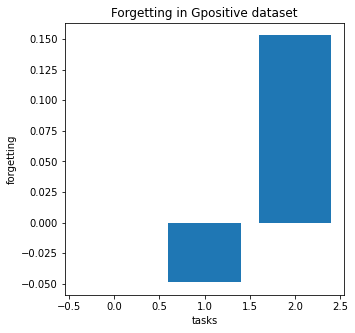

In [3]:
hparams_dict = {
    'inputs': 300,
    'outputs': 4,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Gpositive',
    'tasks': {'samples': [105, 103, 103], 'labels': [2, 1, 1]},
    'seed': 2,
    'ckpt_dir': './checkpoints/gpositive',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (105, 1, 300)
Train Labels shape is  (105, 2)
Classes trained are: 0 to 2


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 2500/2500 [31:40<00:00,  1.32it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.348558  |
| zero_one_loss       | 0.663462  |
| one_error           | 0.0336538 |
| micro av. jaccard   | 0.325581  |
| macro av. jaccard   | 0.168269  |
| micro av. precision | 0.336538  |
| macro av. precision | 0.168269  |
| micro av. recall    | 0.909091  |
| macro av. recall    | 0.5       |
| micro av. f1        | 0.491228  |
| macro av. f1        | 0.251799  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.348558  |
| zero_one_loss       | 0.663462  |
| one_error           | 0.0336538 |
| micro av. jaccard   | 0.325581  |
| macro av. jaccard   | 0.168269  |
| micro av. precision | 0.336538  |
| macro av. precis

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 4
Class 2, class 1 neurons = 1, class 0 neurons = 12


100%|██████████| 2500/2500 [1:03:28<00:00,  1.52s/it]


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.235577 |
| zero_one_loss       | 0.235577 |
| one_error           | 0.235577 |
| micro av. jaccard   | 0.618677 |
| macro av. jaccard   | 0.382212 |
| micro av. precision | 0.764423 |
| macro av. precision | 0.382212 |
| micro av. recall    | 0.764423 |
| macro av. recall    | 0.5      |
| micro av. f1        | 0.764423 |
| macro av. f1        | 0.433243 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 3) (208, 3)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.310897 |
| zero_one_loss       | 0.668269 |
| one_error           | 0        |
| micro av. jaccard   | 0.265152 |
| macro av. jaccard   | 0.112179 |
| micro av. precision | 0.336538 |
| macro av. precision | 0.112179 |
| micro av. recall    | 0.555556

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 3, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 1, class 0 neurons = 12
Class 3, class 1 neurons = 2, class 0 neurons = 12


100%|██████████| 2500/2500 [1:39:37<00:00,  2.39s/it]


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.307692 |
| zero_one_loss       | 0.307692 |
| one_error           | 0.307692 |
| micro av. jaccard   | 0.529412 |
| macro av. jaccard   | 0.523617 |
| micro av. precision | 0.692308 |
| macro av. precision | 0.684956 |
| micro av. recall    | 0.692308 |
| macro av. recall    | 0.691373 |
| micro av. f1        | 0.692308 |
| macro av. f1        | 0.685771 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 4) (208, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.310096 |
| zero_one_loss       | 0.807692 |
| one_error           | 0        |
| micro av. jaccard   | 0.32987  |
| macro av. jaccard   | 0.201903 |
| micro av. precision | 0.419142 |
| macro av. precision | 0.234135 |
| micro av. recall    | 0.607656

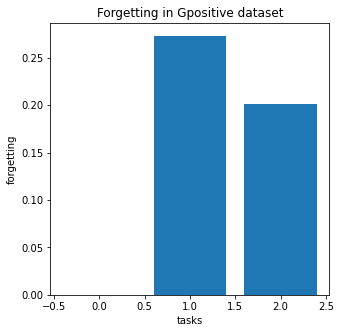

In [4]:
hparams_dict = {
    'inputs': 300,
    'outputs': 4,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Gpositive',
    'tasks': {'samples': [105, 103, 103], 'labels': [2, 1, 1]},
    'seed': 4,
    'ckpt_dir': './checkpoints/gpositive',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (105, 1, 300)
Train Labels shape is  (105, 2)
Classes trained are: 0 to 2


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 2500/2500 [31:39<00:00,  1.32it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.348558  |
| zero_one_loss       | 0.663462  |
| one_error           | 0.0336538 |
| micro av. jaccard   | 0.325581  |
| macro av. jaccard   | 0.168269  |
| micro av. precision | 0.336538  |
| macro av. precision | 0.168269  |
| micro av. recall    | 0.909091  |
| macro av. recall    | 0.5       |
| micro av. f1        | 0.491228  |
| macro av. f1        | 0.251799  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 2) (208, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.348558  |
| zero_one_loss       | 0.663462  |
| one_error           | 0.0336538 |
| micro av. jaccard   | 0.325581  |
| macro av. jaccard   | 0.168269  |
| micro av. precision | 0.336538  |
| macro av. precis

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 4
Class 2, class 1 neurons = 2, class 0 neurons = 3


100%|██████████| 2500/2500 [51:49<00:00,  1.24s/it]


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.557692 |
| zero_one_loss       | 0.557692 |
| one_error           | 0.557692 |
| micro av. jaccard   | 0.283951 |
| macro av. jaccard   | 0.244543 |
| micro av. precision | 0.442308 |
| macro av. precision | 0.708543 |
| micro av. recall    | 0.442308 |
| macro av. recall    | 0.536    |
| micro av. f1        | 0.442308 |
| macro av. f1        | 0.36149  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 3) (208, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.418269  |
| zero_one_loss       | 0.990385  |
| one_error           | 0.0192308 |
| micro av. jaccard   | 0.369565  |
| macro av. jaccard   | 0.251208  |
| micro av. precision | 0.375921  |
| macro av. precision | 0.251208  |
| micro av. recall    |

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 3, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 14, class 0 neurons = 6
Class 3, class 1 neurons = 10, class 0 neurons = 2


100%|██████████| 2500/2500 [1:47:51<00:00,  2.59s/it]


Evaluating in individual mode on test set
binary binary
uint8 int64
(208, 1) (208, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.355769 |
| zero_one_loss       | 0.355769 |
| one_error           | 0.355769 |
| micro av. jaccard   | 0.475177 |
| macro av. jaccard   | 0.459518 |
| micro av. precision | 0.644231 |
| macro av. precision | 0.662766 |
| micro av. recall    | 0.644231 |
| macro av. recall    | 0.724939 |
| micro av. f1        | 0.644231 |
| macro av. f1        | 0.624219 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(208, 4) (208, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.40625   |
| zero_one_loss       | 1         |
| one_error           | 0.0240385 |
| micro av. jaccard   | 0.367041  |
| macro av. jaccard   | 0.278738  |
| micro av. precision | 0.3762    |
| macro av. precision | 0.283704  |
| micro av. recall    |

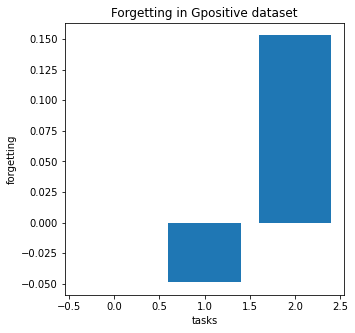

In [5]:
hparams_dict = {
    'inputs': 300,
    'outputs': 4,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Gpositive',
    'tasks': {'samples': [105, 103, 103], 'labels': [2, 1, 1]},
    'seed': 5,
    'ckpt_dir': './checkpoints/gpositive',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)